In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

%matplotlib inline

path = '../data/covers/'

In [2]:
df = pd.read_csv(path+'base.csv',sep=';',decimal=',')
df.replace(to_replace=r'properties', value='jpg', regex=True,inplace=True)
df.head()

,name,b1,b2,h1,h2,s1,s2
0,0001BFD8A4B8735B5BEE52282B392820.jpg,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622
1,000252148AEA0C1F52DF52067D47A924.jpg,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0
2,00030CA61304CA486165F1FFE701DAF9.jpg,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477
3,000502B337F3EECF034B4B202EC0250B.jpg,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653
4,000527A374338971ADB8C68E3DD8FBAD.jpg,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008


In [3]:
for c in df.columns[1:]:
    df[c] = df[c].apply(lambda x: int(10*float(x)))

In [4]:
df['group']=100000*df.h1 + 10000*df.s1 + 1000*df.b1 + 100*df.h2 + 10*df.s2 + df.b2
df.head()

,name,b1,b2,h1,h2,s1,s2,group
0,0001BFD8A4B8735B5BEE52282B392820.jpg,4,3,4,3,4,2,444323
1,000252148AEA0C1F52DF52067D47A924.jpg,9,1,0,0,0,0,9001
2,00030CA61304CA486165F1FFE701DAF9.jpg,7,1,4,1,8,2,487121
3,000502B337F3EECF034B4B202EC0250B.jpg,4,3,4,2,3,2,434223
4,000527A374338971ADB8C68E3DD8FBAD.jpg,8,3,1,3,1,2,118323


In [5]:
def images_subset_plot(df,group):
    images = []
    subset = df[df.group==group].sample(20)
    for index, row in enumerate(subset.name):
        images.append(mpimg.imread(path+'/COVER_JPEG/'+row))

    plt.figure(figsize=(20,10))
    plt.suptitle('========group {} ========'.format(group), fontsize=16)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

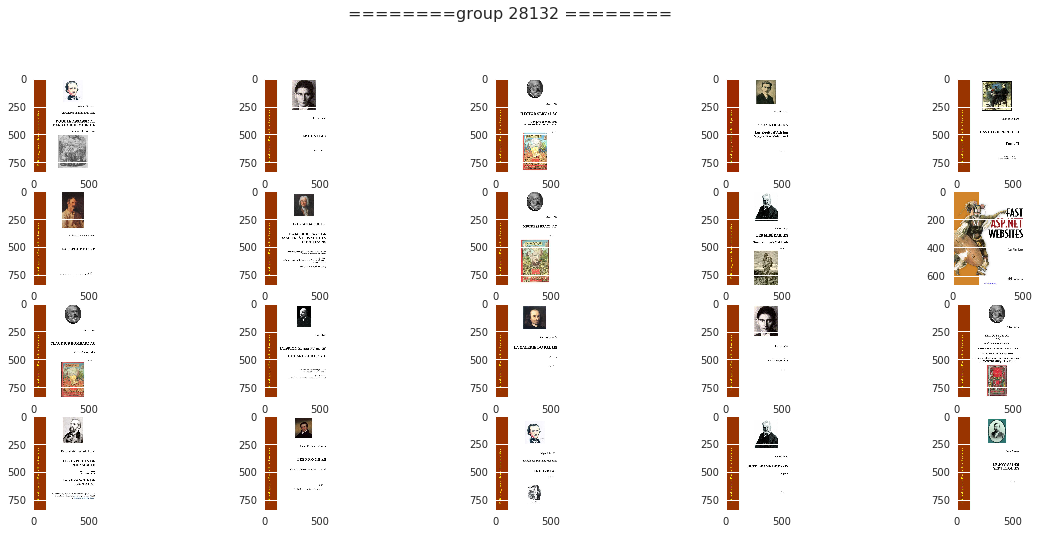

In [6]:
images_subset_plot(df,28132)

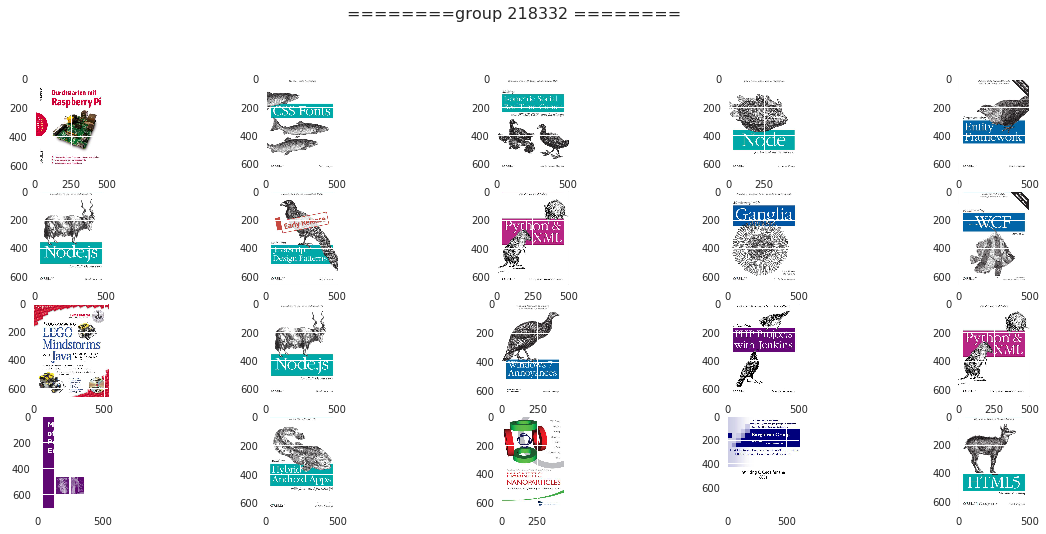

In [7]:
images_subset_plot(df,218332)

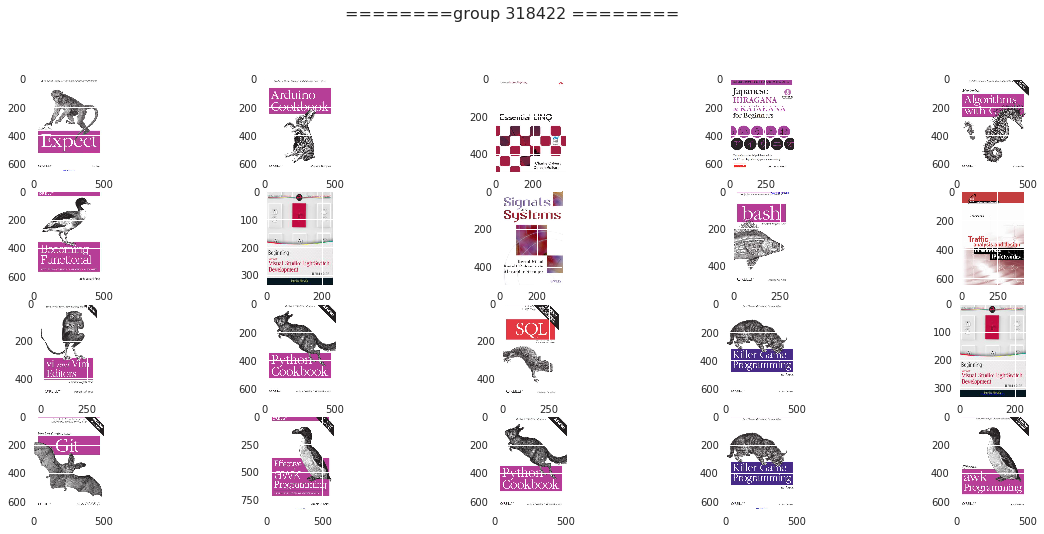

In [8]:
images_subset_plot(df,318422)

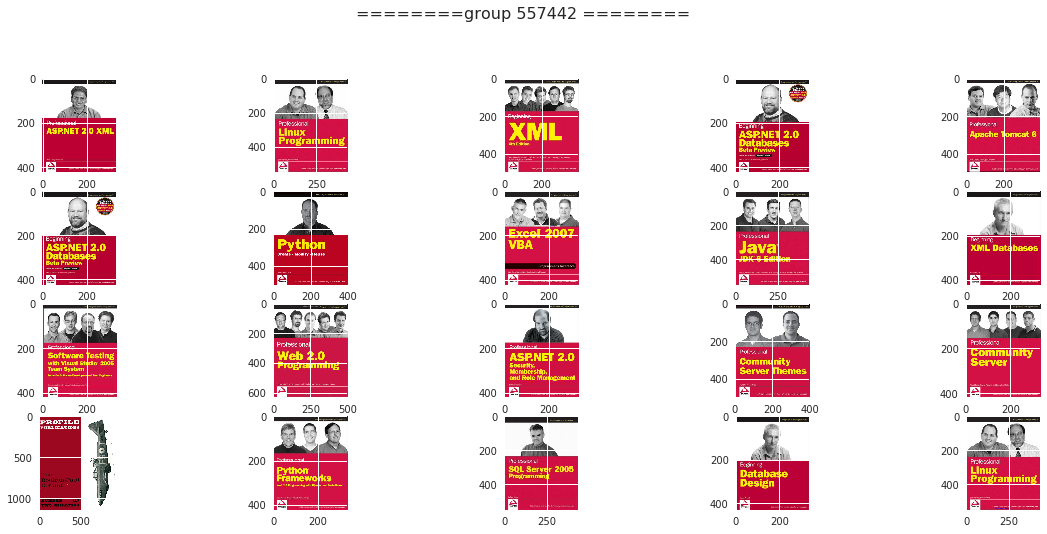

In [9]:
images_subset_plot(df,557442)

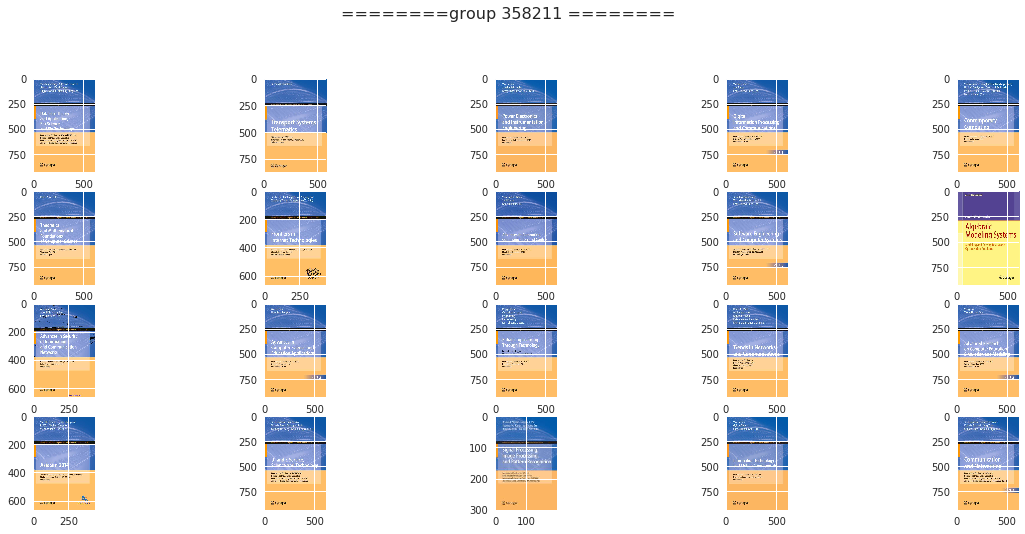

In [10]:
images_subset_plot(df,358211)